# Introduction

Notebook para avaliar dados de experimentos para validar proposta de NAS-v3 com **Reinforcement Learning** em comparação com algoritmos **Random** e **Regularized Evolution**.

# Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [2]:
def get_best_arch(df, algo_name, dataset, max_train_hours):
    df = df[(df.algorithm == algo_name) & (df.dataset == dataset) & (df.max_train_hours == max_train_hours)]
    df = df.sort_values(by='val_acc', ascending=False)
    best = df.iloc[0]
    return best


algos_list = ['random','evolution','rl']
datasets_list = ['cifar10','cifar100','ImageNet16-120']
mth_list = [1,10,50,100,200]
ss_indicators = ['sss','tss']

results_list = []
for ss in ss_indicators:
    for algo in algos_list:
        for ds in datasets_list:
            for mth in mth_list:
                config_name = f'{ss}/{algo}_{mth}h_{ds}'
                file_path = f'./data/{config_name}.csv'
                df = pd.read_csv(f'./data/{config_name}.csv')
                print(f'Reading csv file: {file_path} | Shape: {df.shape}')
                best = df.iloc[0]
                results_list.append({'config_name': config_name, 
                                     'data':best, 
                                     'mean_val_acc': round(np.mean(df.val_acc),4), 
                                     'mean_test_acc': round(np.mean(df.test_acc),4),
                                     'mean_train_acc': round(np.mean(df.train_accuracy),4)})

Reading csv file: ./data/sss/random_1h_cifar10.csv | Shape: (68, 21)
Reading csv file: ./data/sss/random_10h_cifar10.csv | Shape: (685, 21)
Reading csv file: ./data/sss/random_50h_cifar10.csv | Shape: (3415, 21)
Reading csv file: ./data/sss/random_100h_cifar10.csv | Shape: (6847, 21)
Reading csv file: ./data/sss/random_200h_cifar10.csv | Shape: (13678, 21)
Reading csv file: ./data/sss/random_1h_cifar100.csv | Shape: (37, 21)
Reading csv file: ./data/sss/random_10h_cifar100.csv | Shape: (377, 21)
Reading csv file: ./data/sss/random_50h_cifar100.csv | Shape: (1858, 21)
Reading csv file: ./data/sss/random_100h_cifar100.csv | Shape: (3705, 21)
Reading csv file: ./data/sss/random_200h_cifar100.csv | Shape: (7399, 21)
Reading csv file: ./data/sss/random_1h_ImageNet16-120.csv | Shape: (25, 21)
Reading csv file: ./data/sss/random_10h_ImageNet16-120.csv | Shape: (249, 21)
Reading csv file: ./data/sss/random_50h_ImageNet16-120.csv | Shape: (1243, 21)
Reading csv file: ./data/sss/random_100h_Imag

# Plot Data

## Utility Functions

In [3]:

metric_2_scalerange_map = {
    'val_acc'            : {'xlim':[0,100]       , 'xticks':range(0,100,5)},
    'mean_val_acc'       : {'xlim':[0,100]       , 'xticks':range(0,100,5)},
    'test_acc'           : {'xlim':[0,100]       , 'xticks':range(0,100,5)},
    'mean_test_acc'      : {'xlim':[0,100]       , 'xticks':range(0,100,5)},
    'train_accuracy'     : {'xlim':[0,100]       , 'xticks':range(0,100,5)},
    'mean_train_acc'     : {'xlim':[0,100]       , 'xticks':range(0,100,5)},
    'latency'            : {'xlim':[0,1e-1]      , 'xticks':np.arange(0,1e-1,1e-2)},
    'total_time'         : {'xlim':[0,int(1e6)]  , 'xticks':range(0,int(1e6),int(2e5))},
    'time_cost'          : {'xlim':[0,200]       , 'xticks':range(0,200,20)},
    'time_spent_in_hours': {'xlim':[0,200]       , 'xticks':range(0,200,20)}
}


def __get_data(dataset, metric_name):
    results_filtered = [x for x in results_list if dataset == x['config_name'].split('_')[2]]

    configs = [x['config_name'].replace(f'_{dataset}','') for x in results_filtered]
    if metric_name in ['val_acc','train_accuracy','test_acc']:
        metric_values = [x['data'][metric_name] for x in results_filtered]
    else:
        metric_values = [x[metric_name] for x in results_filtered]
    
    return configs,metric_values


def __get_colors_list(configs):
    colors = []
    for conf in configs:
        if 'evolution' in conf:
            colors.append('orange')
        elif 'rl' in conf:
            colors.append('green')
        elif 'random' in conf:
            colors.append('blue')
    return colors
    

def __draw_subplot(ax, dataset, metric_name):
    configs, metric_values = __get_data(dataset, metric_name)
    colors_list = __get_colors_list(configs)
    if metric_name in ['train_acc','val_acc','test_acc']:
        ax.set_title(f'Best architecture found - {dataset.upper()}')
    else:
        ax.set_title(f'{dataset.upper()}')
    ax.barh(configs, metric_values, color = colors_list)
    ax.set_xlabel(f'{metric_name.upper()} (%)')
    ax.set_ylabel('Configuration')
    ax.grid()
    xlims = metric_2_scalerange_map[metric_name]['xlim']
    xticks = metric_2_scalerange_map[metric_name]['xticks']
    ax.set_xlim(xlims[0],xlims[1])
    ax.set_xticks(xticks)
    ylocs, ylabs = plt.yticks()
    for i, v in enumerate(metric_values):
        ax.text(v + 0.01, ylocs[i] - 0.25, str(round(v,4)))
    return ax


def draw_bar_plots(metric_name):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,10), sharey=True)
    __draw_subplot(axes[0], 'cifar10',        metric_name)
    __draw_subplot(axes[1], 'cifar100',       metric_name)
    __draw_subplot(axes[2], 'ImageNet16-120', metric_name)
    plt.show()

## Validation Accuracy

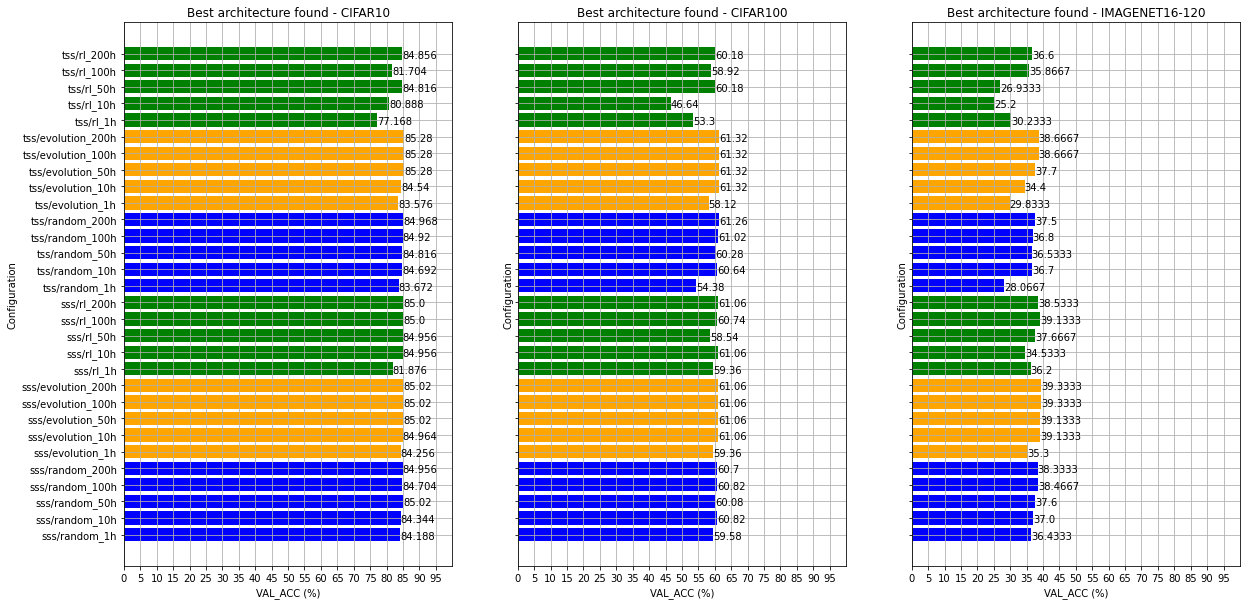

In [4]:
draw_bar_plots('val_acc')

## Test Accuracy

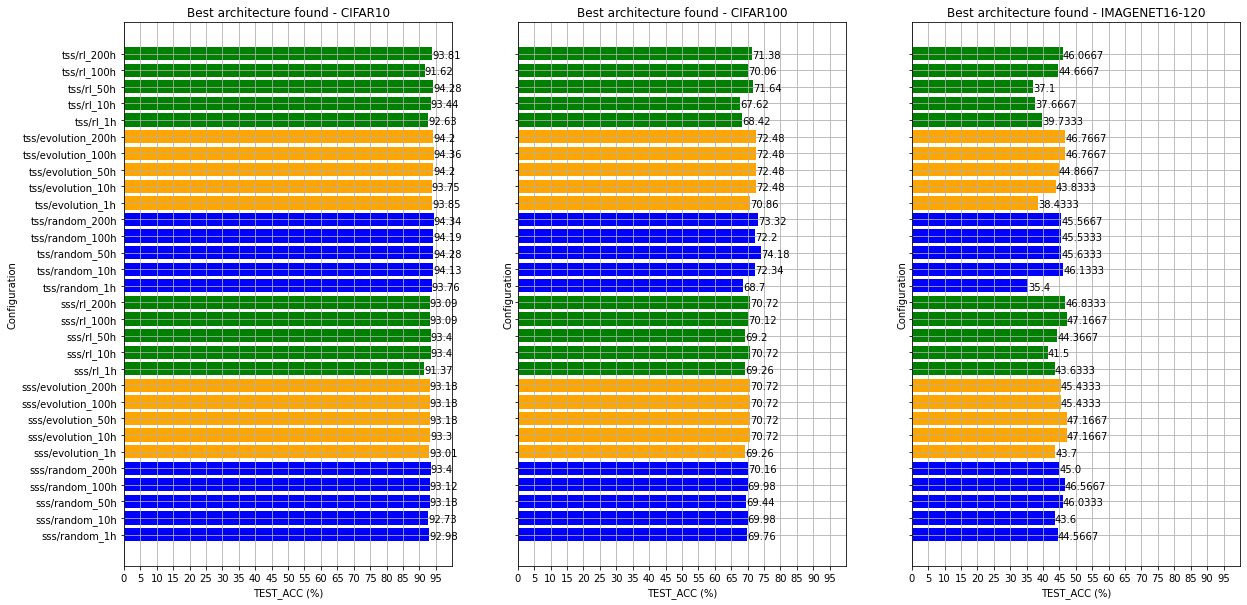

In [5]:
draw_bar_plots('test_acc')

## Train Accuracy

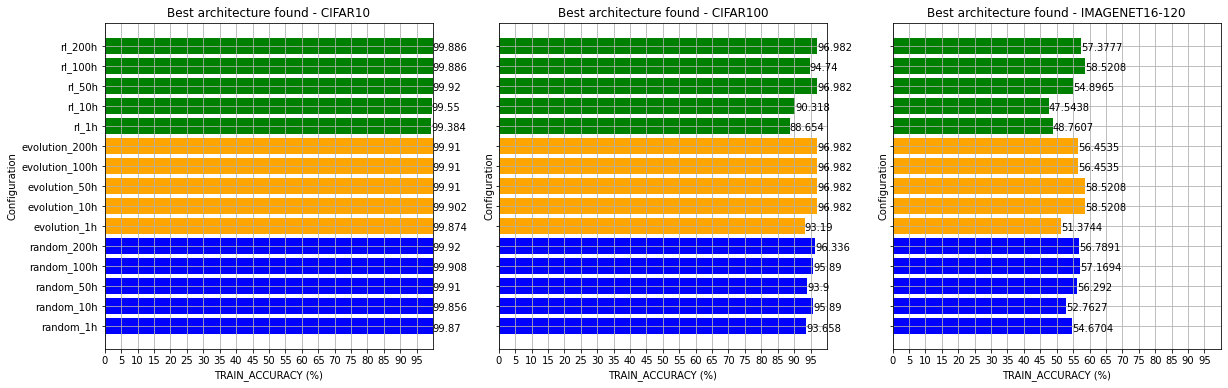

In [35]:
draw_bar_plots('train_accuracy')

## Latency

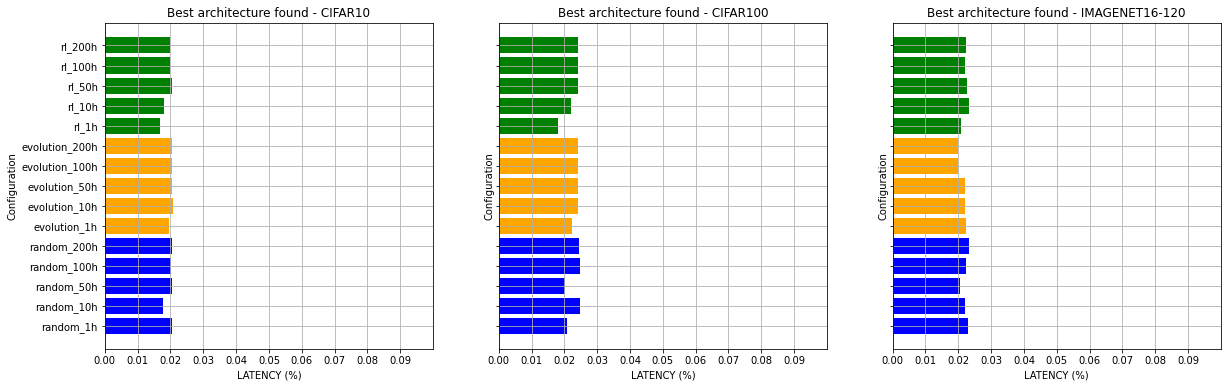

In [71]:
draw_bar_plots('latency')

## Total Time

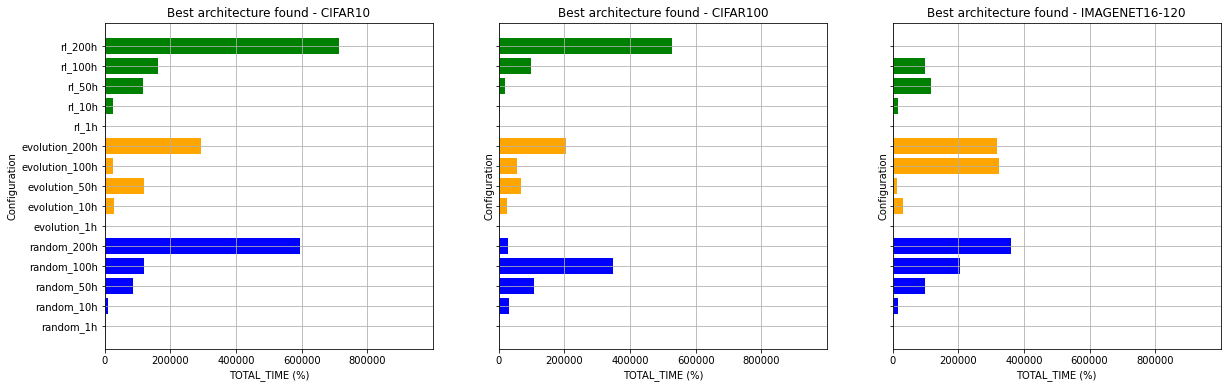

In [119]:
draw_bar_plots('total_time')

## Time Cost

"The time_cost is calculated as the total training time for a few (e.g., 12 epochs) plus the evaluation time for one epoch."
 -- XAutoDL code

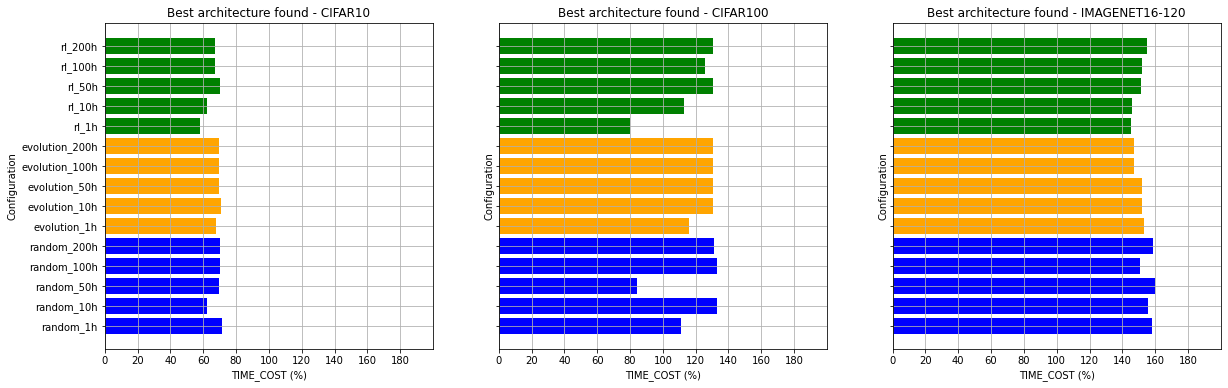

In [83]:
draw_bar_plots('time_cost')

## Time Spent in Hours

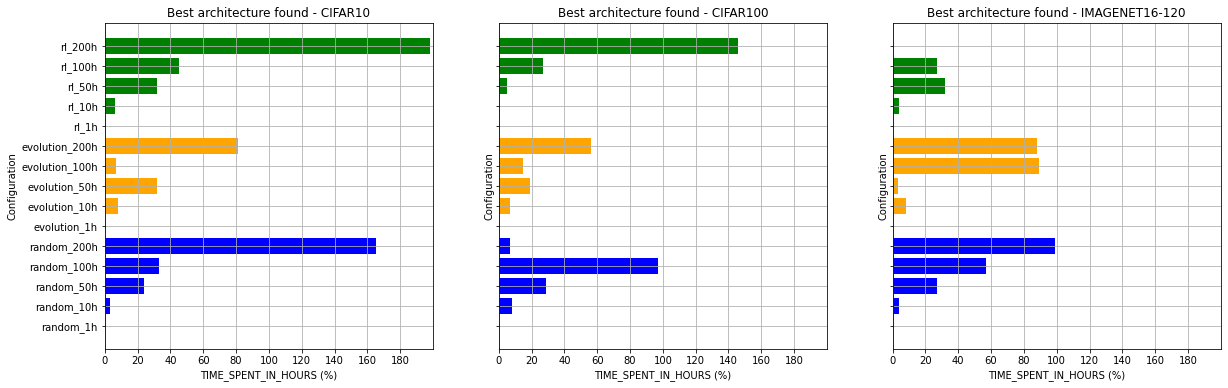

In [82]:
draw_bar_plots('time_spent_in_hours')

## Mean Train Acc

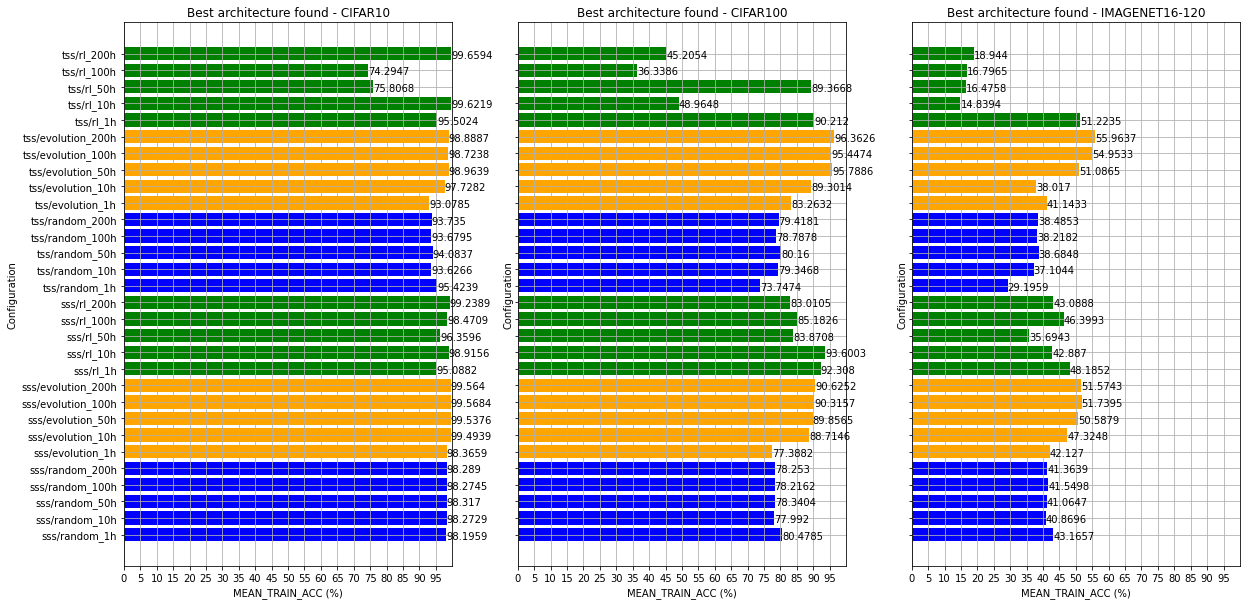

In [22]:
draw_bar_plots('mean_train_acc')

## Mean Val Acc

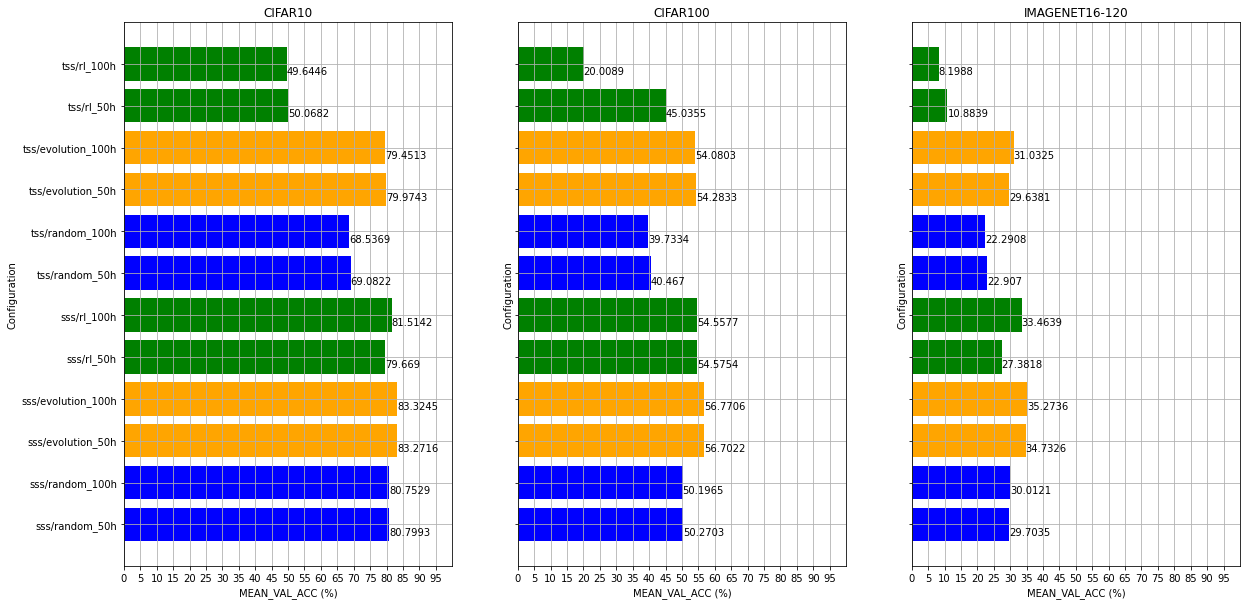

In [42]:
draw_bar_plots('mean_val_acc')

## Mean Test Acc

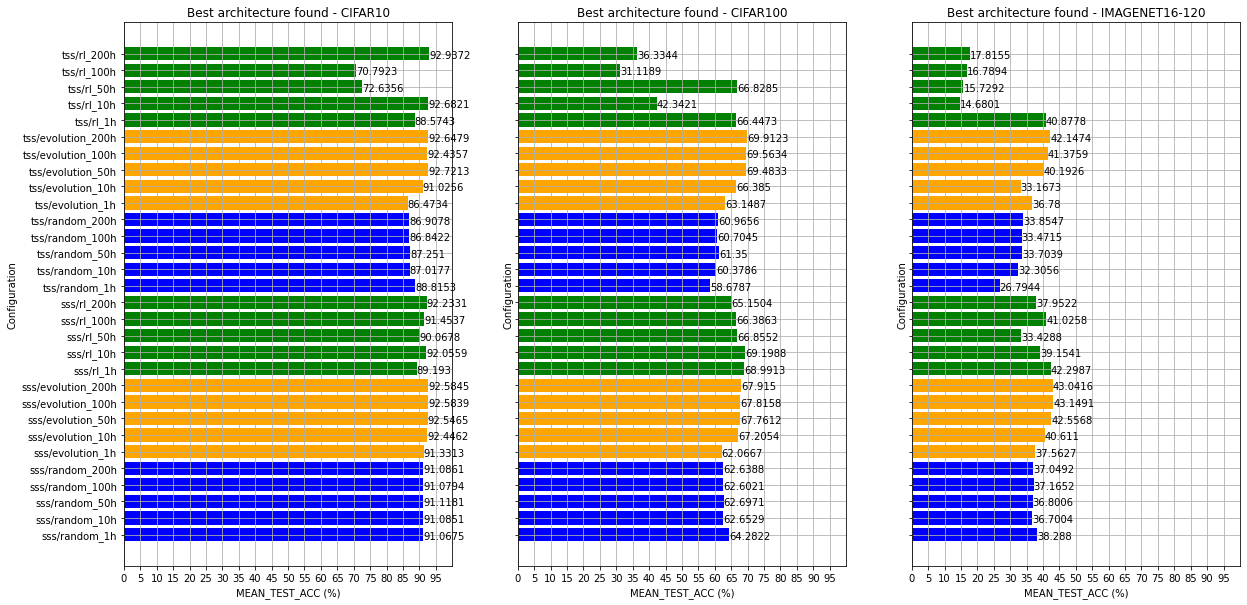

In [23]:
draw_bar_plots('mean_test_acc')